E:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
E:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
E:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


58195.86379076381


E:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Press any button...


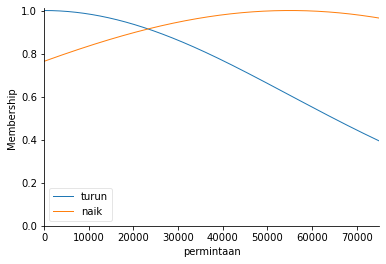

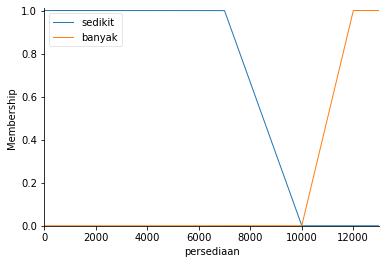

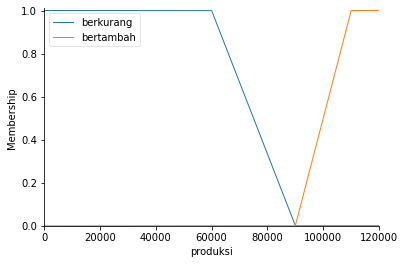

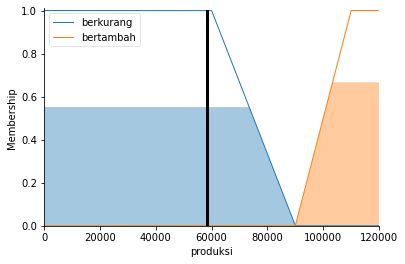

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

permintaan = ctrl.Antecedent(np.arange(0, 75001, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 13001, 1), 'persediaan')
produksi = ctrl.Consequent(np.arange(0, 120001, 1), 'produksi')

permintaan['turun'] = fuzz.gaussmf(permintaan.universe, 0, 55000)
permintaan['naik'] = fuzz.gaussmf(permintaan.universe, 55000, 75000)

persediaan['sedikit']= fuzz.trapmf(persediaan.universe, [0, 0, 7000, 10000])
persediaan['banyak']= fuzz.trapmf(persediaan.universe, [10000, 12000, 13000, 13000])

produksi['berkurang'] = fuzz.trapmf(produksi.universe, [0, 0, 60000, 90000])
produksi['bertambah'] = fuzz.trapmf(produksi.universe, [90000, 110000, 120000, 120000])

permintaan.view()
persediaan.view()
produksi.view()

rule1 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule2 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])
rule3 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['bertambah'])
rule4 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['berkurang'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['permintaan'] = 60000
tipping.input['persediaan'] = 8000

tipping.compute()

print(tipping.output['produksi'])
produksi.view(sim=tipping)

inp = input("Press any button...")
